In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

from datetime import datetime, timedelta

# Consumption data

In [2]:
kwhs = pd.read_csv("../../prop39schools/sample_data/15634040000000_2012-2013_SCE_ELECTRIC_20150722.xml_INTERVAL.csv", header=None)

In [3]:
kwhs.rename(columns={0:"id", 1:"date"}, inplace=True)

# date is in Unix timestamp format, convert to ISO format
kwhs['date'] = kwhs['date'].apply(lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d'))
agreement_id = kwhs['id'].iloc[0]
kwhs.drop("id", axis=1, inplace=True)

kwhs.set_index(["date"], inplace=True)

In [4]:
kwhs.head()

,2,3,4,5,6,7,8,9,10,11,...,192,193,194,195,196,197,198,199,200,201
date,,,,,,,,,,,,,,,,,,,,,
2012-06-30,0.72,4.32,3.06,0.66,0.60,0.66,0.66,0.72,0.72,0.60,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2012-07-01,0.66,0.72,0.66,0.66,0.66,0.72,0.66,0.66,0.72,0.66,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2012-07-02,0.72,0.72,0.66,0.66,0.66,0.66,0.66,0.66,0.72,0.72,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2012-07-03,0.72,0.66,0.66,0.72,0.66,0.78,0.66,0.72,0.66,0.78,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2012-07-04,0.66,0.72,0.66,0.72,0.72,0.78,0.66,0.72,0.66,0.66,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
kwhs.shape

(1428, 200)

In [6]:
(kwhs.sum(0)>0).sum()

98

In [7]:
(kwhs.count()>0).sum()-2

194

In [8]:
kwhs.ix['2013-06-03']

,2,3,4,5,6,7,8,9,10,11,...,192,193,194,195,196,197,198,199,200,201
date,,,,,,,,,,,,,,,,,,,,,
2013-06-03,0.6000,0.660,0.660,0.600,0.6,0.660,0.72,0.600,0.660,0.600,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2013-06-03,4.0000,3.200,3.600,4.000,3.6,3.600,3.60,4.000,3.600,3.600,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2013-06-03,1.9981,1.926,1.818,2.034,1.8,1.818,1.80,2.034,1.944,1.746,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2013-06-03,1.1700,1.140,1.110,1.210,1.2,1.320,1.40,1.410,1.410,1.180,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


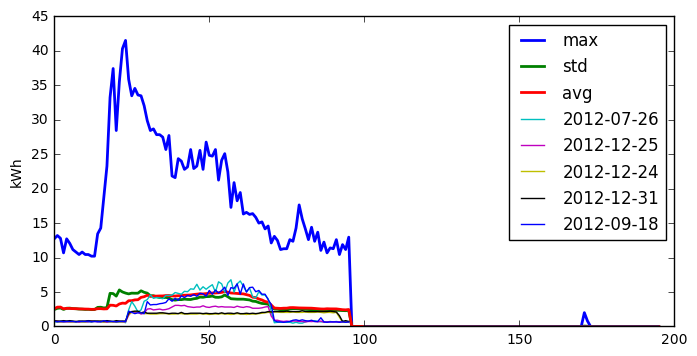

In [9]:
# It looks like this is 15-minute interval data?

plt.figure(figsize=(8,4))
plt.plot(kwhs.max().values, label="max", lw=2)
plt.plot(kwhs.std().values, label="std", lw=2)
plt.plot(kwhs.mean().values, label="avg", lw=2)

idx = np.random.choice(kwhs.index.values, 5)
for i in idx:
    plt.plot(kwhs.ix[i].values[0], label=i)
    
plt.ylabel("kWh")
plt.legend()


In [10]:
idx

array(['2012-07-26', '2012-12-25', '2012-12-24', '2012-12-31', '2012-09-18'], dtype=object)

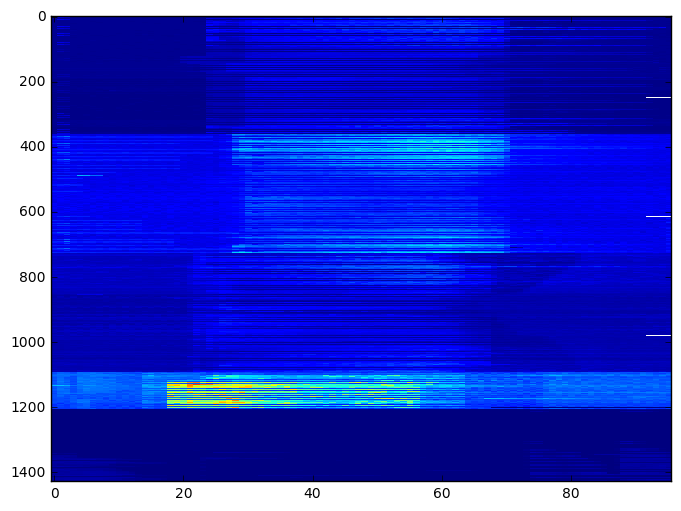

In [11]:
plt.figure(figsize=(8,6))
plt.imshow(kwhs.iloc[:,:96].values, interpolation='nearest', aspect='auto')

# Billing data

In [12]:
bill = pd.read_csv("../../prop39schools/sample_data/15634040000000_2012-2013_SCE_ELECTRIC_20150722.xml_BILL.csv")
bill.iloc[1]

customer_name                            NaN
customer_city                            NaN
customer_zip                             NaN
customer_account                         NaN
lea_customer         Delano Union Elementary
cds_code                      15634040000000
school_site_name     Delano Union Elementary
school_city                           Delano
school_site_zip                   93215-2416
agreement                            1183021
units                                    kWh
demandUnits                               kW
rate_schedule_id                  GS-2-TOU-A
n_days                                    29
generation                             False
start_time                        1343088000
last_period                          2296.88
consumption_total                       7714
on_peak                                  NaN
semi_peak                                NaN
off_peak                                 NaN
on_peak_demand                         36.48
semi_peak_

In [13]:
bill.shape

(69, 24)

In [14]:
bill['start_time'] = bill['start_time'].apply(lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d'))

zipcode = bill['school_site_zip'].iloc[0]

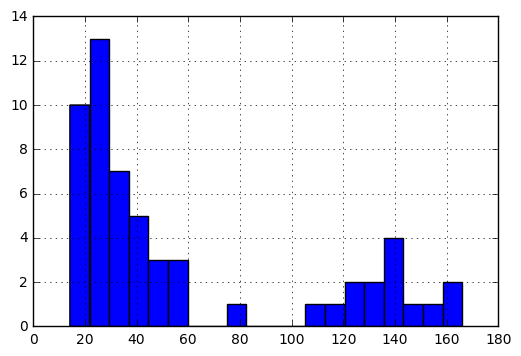

In [15]:
bill['off_peak_demand'].hist(bins=20)

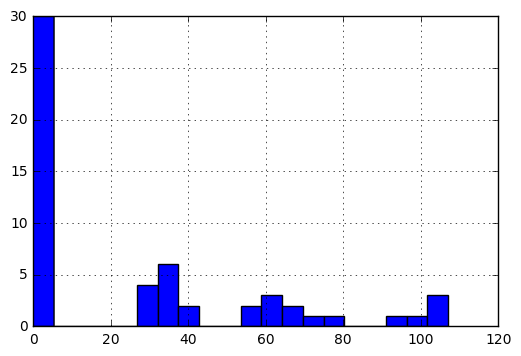

In [16]:
bill['on_peak_demand'].hist(bins=20)

In [17]:
bill.head()

,customer_name,customer_city,customer_zip,customer_account,lea_customer,cds_code,school_site_name,school_city,school_site_zip,agreement,...,generation,start_time,last_period,consumption_total,on_peak,semi_peak,off_peak,on_peak_demand,semi_peak_demand,off_peak_demand
0,NaN,NaN,NaN,NaN,Delano Union Elementary,15634040000000,Delano Union Elementary,Delano,93215-2416,1183021,...,False,2012-06-20,2144.97,7544,NaN,NaN,NaN,33.36,30.96,24.48
1,NaN,NaN,NaN,NaN,Delano Union Elementary,15634040000000,Delano Union Elementary,Delano,93215-2416,1183021,...,False,2012-07-23,2296.88,7714,NaN,NaN,NaN,36.48,31.68,27.84
2,NaN,NaN,NaN,NaN,Delano Union Elementary,15634040000000,Delano Union Elementary,Delano,93215-2416,1183021,...,False,2012-08-21,1933.79,6498,NaN,NaN,NaN,31.92,26.16,22.32
3,NaN,NaN,NaN,NaN,Delano Union Elementary,15634040000000,Delano Union Elementary,Delano,93215-2416,1183021,...,False,2012-09-20,1190.14,5721,NaN,NaN,NaN,27.84,30.48,19.68
4,NaN,NaN,NaN,NaN,Delano Union Elementary,15634040000000,Delano Union Elementary,Delano,93215-2416,1183021,...,False,2012-10-23,757.61,4727,0,2964,1763,0.00,22.08,14.64


In [18]:
bill['school_site_name'].value_counts()

Delano Union Elementary    69
Name: school_site_name, dtype: int64